<a href="https://colab.research.google.com/github/Sanku1234/abhishek/blob/main/3d_Copy_of_Machine_learning_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment: (3d), Perform Logistic Regression in a given dataset.
#### a. Find cost function, plot the sigmoid curve.
#### b. Evaluate the gradient descent with 3 learning rate?
#### c. Find out inference from all three learning rate.


In [1]:
# Numerical computation
import numpy as np
# Data handling
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Logistic Regression (sklearn)
from sklearn.linear_model import LogisticRegression
# Gradient Descent based classifier- stochastic gradient descent
from sklearn.linear_model import SGDClassifier
# Train-test split
from sklearn.model_selection import train_test_split
# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
import pandas as pd

# Create the dataset
data = {
    "Hours Studied": [1, 2, 3, 4, 5],
    "Pass or Fail": [0, 0, 0, 1, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Hours Studied,Pass or Fail
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1


#### a. Find cost function, plot the sigmoid curve.

In [3]:
# Separate features (X) and target (y)
X = df[["Hours Studied"]]   # independent variable
y = df["Pass or Fail"]     # dependent variable

# Create Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X, y)


LogisticRegression()

In [4]:
print("Coefficient (w):", model.coef_)
print("Intercept (b):", model.intercept_)


Coefficient (w): [[1.0470438]]
Intercept (b): [-3.74817743]


In [5]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log Loss)
def cost_function(X, y, w, b):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)

    # Log loss
    cost = -(1/m) * np.sum(
        y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    )
    return cost

In [6]:
# Dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1])

# Parameters from trained logistic regression model
w = model.coef_.flatten()
b = model.intercept_[0]

# Compute cost
cost = cost_function(X, y, w, b)
print("Cost Function Value:", cost)

Cost Function Value: 0.27518617624749253


In [7]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 0, 1, 1])

In [8]:
w = 1.0470438
b = -3.74817743


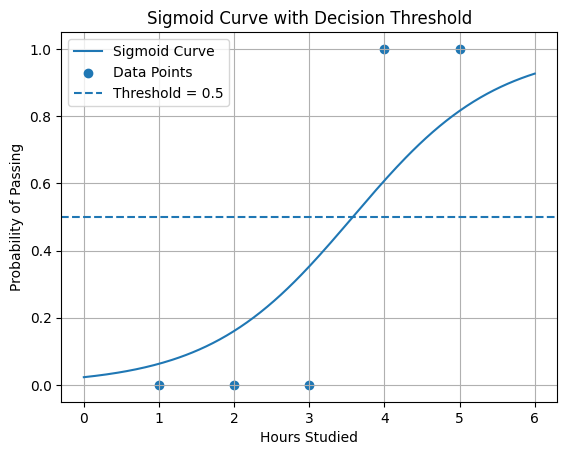

In [9]:
# Sigmoid curve
x_vals = np.linspace(0, 6, 200)
z_vals = w * x_vals + b
y_vals = sigmoid(z_vals)

# Plot
plt.figure()
plt.plot(x_vals, y_vals, label="Sigmoid Curve")
plt.scatter(X, y, label="Data Points")

# Threshold line
plt.axhline(y=0.5, linestyle='--', label="Threshold = 0.5")

plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.title("Sigmoid Curve with Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()

#### b. Evaluate the gradient descent with 3 learning rate?


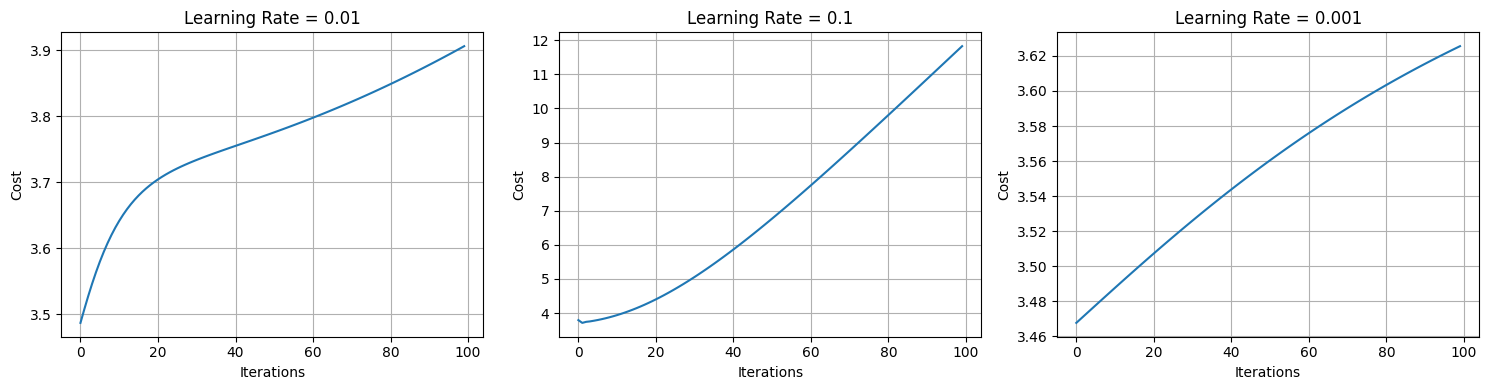

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1])
m = len(y)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (Log Loss)
def compute_cost(X, y, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    cost = -(1/m) * np.sum(
        y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)
    )
    return cost

# Gradient Descent algorithm
def gradient_descent(X, y, lr, iterations):
    w = 0.0
    b = 0.0
    cost_history = []

    for _ in range(iterations):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        dw = (1/m) * np.sum((y_hat - y) * X.flatten())
        db = (1/m) * np.sum(y_hat - y)

        w = w - lr * dw
        b = b - lr * db

        cost_history.append(compute_cost(X, y, w, b))

    return cost_history

# Learning rates
learning_rates = [0.01, 0.1, 0.001]
iterations = 100

# Plot cost vs iterations (single row)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, lr in zip(axes, learning_rates):
    cost_history = gradient_descent(X, y, lr, iterations)
    ax.plot(cost_history)
    ax.set_title(f"Learning Rate = {lr}")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Cost")
    ax.grid(True)

plt.tight_layout()
plt.show()



C. **Inference:** For this dataset and gradient descent implementation, 0.01 is the best learning rate because it provides stable and efficient convergence without oscillation.